# IE 360 HW 1
## Necdet Sinan Parlar


### Introduction


As with all goods and services, market conditions, namely the balance of supply and demand, determine housing prices. During periods when the demand for home purchases increases more rapidly than the supply of homes, excess demand creates upward pressure on prices. Conversely, when demand grows more slowly than supply over time, it leads to the accumulation of housing stock, which puts downward pressure on prices
.

Demand in the housing market, as well as in all real estate markets generally, is highly sensitive to cyclical fluctuations and is directly related to individual income levels. Home purchase demand increases rapidly during periods of increasing prosperity and rapid economic growth, while it decreases rapidly during periods of economic contraction and declining incomes.

 
The unemployment rate rises during periods of economic contraction and reduced economic activity. Rising unemployment leads to a decrease in household incomes and causes individuals to cut back on spending and become pessimistic about future income, leading them to avoid taking on larger economic burdens and risks, including purchasing a home. During periods of declining unemployment and rapid economic growth, individuals become more willing to take on risks due to optimistic expectations for the future. When the expectation of rising housing prices strengthens, purchasing a home becomes a more attractive investment option. The assumption that rising housing prices will cover the cost of credit leads to an increase in the number of people willing to buy a home.h

oConsumer confidence is one of the most important factors determining housing demand. During periods of high consumer confidence, when there is confidence in the economy and positive expectations for the future, individuals develop a strong expectation that housing prices will rise and become more willing to take on risks. Speculators enter the market during such periods, further driving up demand and prices. During periods of low consumer confidence, individuals prefer to wait and only make home purchases to meet urgent needs. In such times, when buying a home is not seen as a profitable investment, speculative real estate investments are not made, leading to a decline in demand and, consequently, a decrease in housing prices. The sale of existing homes due to cash needs or expectations of further price declines increases the surplus of supply, putting additional pressure on prices.n 
p


.

In this study, I tried to aneswer th q,uiion " Is housing unit price in Turkiye related to unemployment rate,and consum conf?"idence index.

### Time Series Regression Analysis

I start by importing necessary packages and adding the relevant data.

In [85]:
library(openxlsx)
require(ggplot2)
require(data.table)
require(skimr)
require(GGally)
require(ggcorrplot)
require(forecast)
require(data.table)
require(dplyr)


Loading required package: skimr
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'skimr'"Loading required package: GGally
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'GGally'"Loading required package: ggcorrplot
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'ggcorrplot'"Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [44]:
data_path = "CBRT_data_2.xlsx"

data = read.xlsx(data_path)
str(data)

'data.frame':	121 obs. of  5 variables:
 $ Date             : chr  "2014-01" "2014-02" "2014-03" "2014-04" ...
 $ TP.YISGUCU2.G8   : num  10.5 10.5 9.4 8.8 8.4 9 9.7 10.1 10.1 10.9 ...
 $ TP.DK.USD.A.YTL  : num  2.22 2.21 2.22 2.13 2.09 ...
 $ TP.TCBF01.TURKIYE: num  1510 1524 1541 1575 1598 ...
 $ TP.TG2.Y01       : num  91.5 89.2 92.4 97.4 95.1 ...


In [45]:
head(data)

Date,TP.YISGUCU2.G8,TP.DK.USD.A.YTL,TP.TCBF01.TURKIYE,TP.TG2.Y01
2014-01,10.5,2.216836,1510.3,91.53853
2014-02,10.5,2.212760,1524.5,89.21453
2014-03,9.4,2.217795,1541.3,92.42525
2014-04,8.8,2.127471,1575.2,97.36987
2014-05,8.4,2.090805,1597.8,95.11075
2014-06,9.0,2.115724,1628.4,93.49903


TP.YISGUCU2.G8 : 
Unemployment rate (%)-Levege Rates
TP.TCBF : .TURKIYE

Housing Unit Prices for Turkey _ TLg Unit Pri : s
TP.TG2.Y01

Consumer ConfidencTP.DK.USD.A.YTL : USD / TLeurvey Questions (*)ons (*)

Checking correlation coefficients, all pairs have less than 0.5 absolute correlation coefficient.

In [57]:
round(cor(series[,c(1,3,4)]),digits = 2)

,TP.YISGUCU2.G8,TP.TCBF01.TURKIYE,TP.TG2.Y01
TP.YISGUCU2.G8,1.00,-0.40,-0.21
TP.TCBF01.TURKIYE,-0.40,1.00,-0.49
TP.TG2.Y01,-0.21,-0.49,1.00


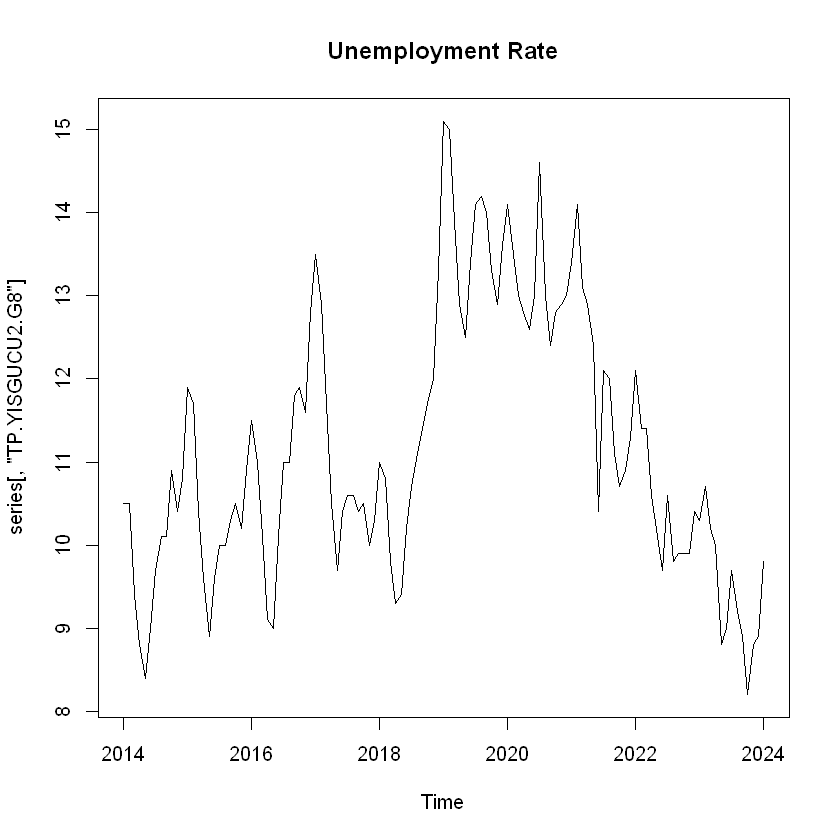

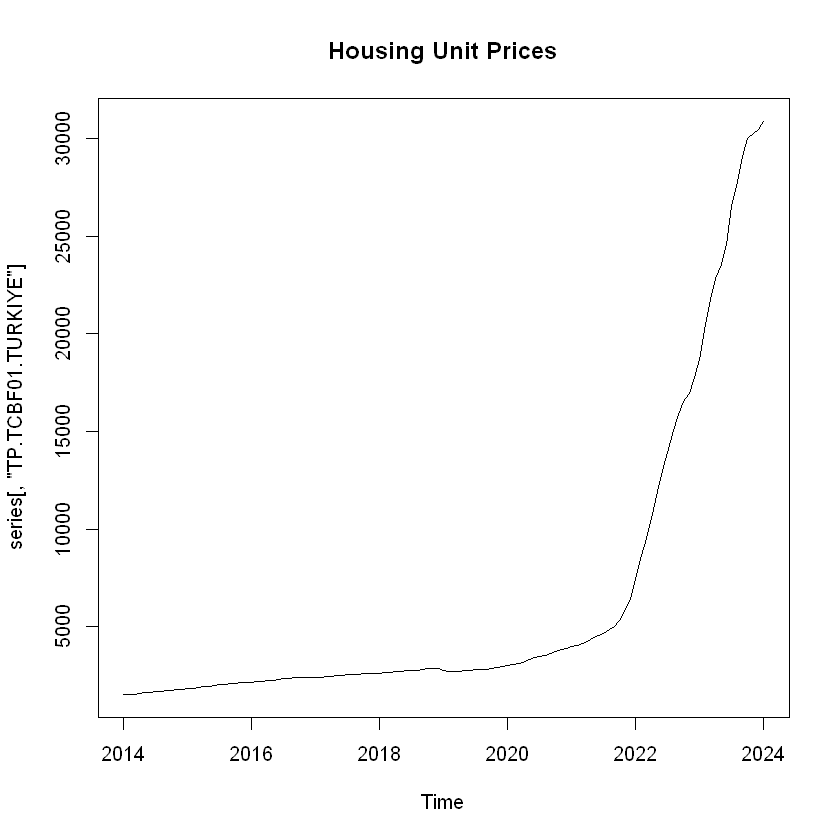

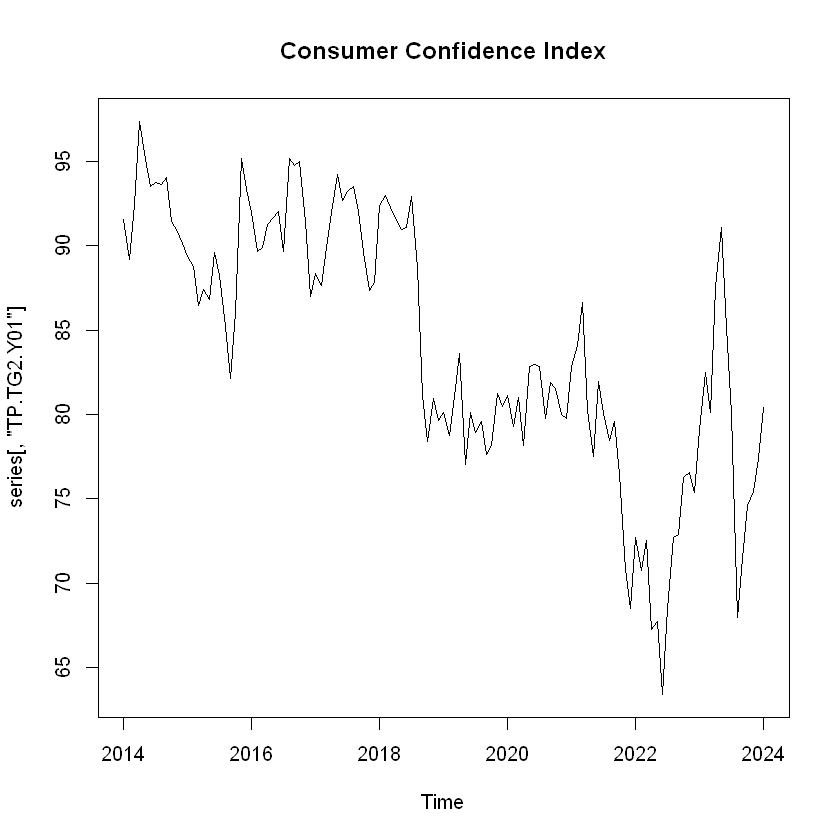

In [50]:
series <- ts(data[,2:5],start = c(2014,1),frequency = 12)

plot(series[,"TP.YISGUCU2.G8"],main = "Unemployment Rate")
plot(series[,"TP.TCBF01.TURKIYE"],main = "Housing Unit Prices")
plot(series[,"TP.TG2.Y01"],main = "Consumer Confidence Index")

Transforming the housing unit prices using dollar series to avoid the high inflation of TL.

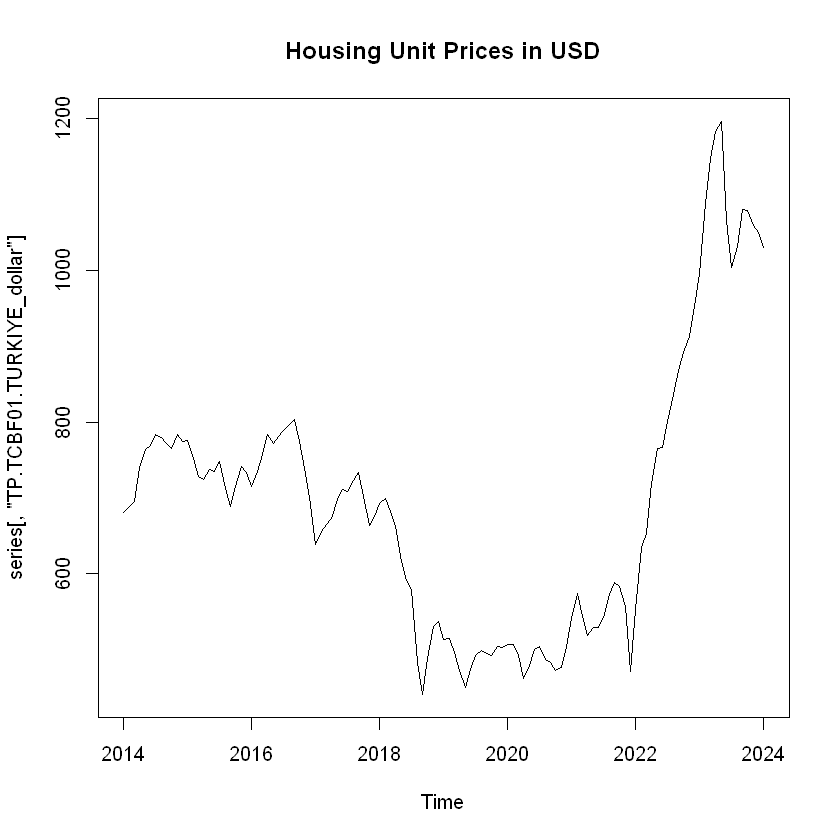

In [60]:
data$TP.TCBF01.TURKIYE_USD <- data$TP.TCBF01.TURKIYE / data$TP.DK.USD.A.YTL

series <- ts(data[,2:6],start = c(2014,1),frequency = 12)

plot(series[,"TP.TCBF01.TURKIYE_dollar"],main = "Housing Unit Prices in USD")

## Importing Google Trends Data

In [152]:
trend_data_path <- "GoogleTrendsData_360HW1.xlsx"

trend_data = read.xlsx(trend_data_path)
trend_series <- ts(trend_data[,2:4],start = c(2014,1),frequency = 12)

str(trend_data)

'data.frame':	121 obs. of  4 variables:
 $ Date                 : chr  "2014-01" "2014-02" "2014-03" "2014-04" ...
 $ Is.Ilani             : num  40 44 38 40 38 45 47 50 54 46 ...
 $ Ev.fiyatlari.düser.mi: num  0 0 0 0 0 0 0 0 0 0 ...
 $ otomobil.modelleri   : num  26 43 28 39 35 27 34 43 37 43 ...


The trend data includes one search volume for each time series. "Is Ilani", "Ev fiyatlari duser mi", and "otomobil modelleri"
searches will be used in models for "unemployment rate", "housing unit prices",and "consumer confidence index" respectively.

The reasons behind my choice of topics are:
1. When unemployment increases, an increase in the "is ilani" search is expected and vice versa.
2. When housing unit prices, an increase in the search "ev fiyatlari duser mi" is expected.
3. When consumer confidence index increases it signals that people have good faith in the economy of the country and they are
   ready to make big purchases such as houses and car, thus we would expect an increase in the search "otomobil modelleri".

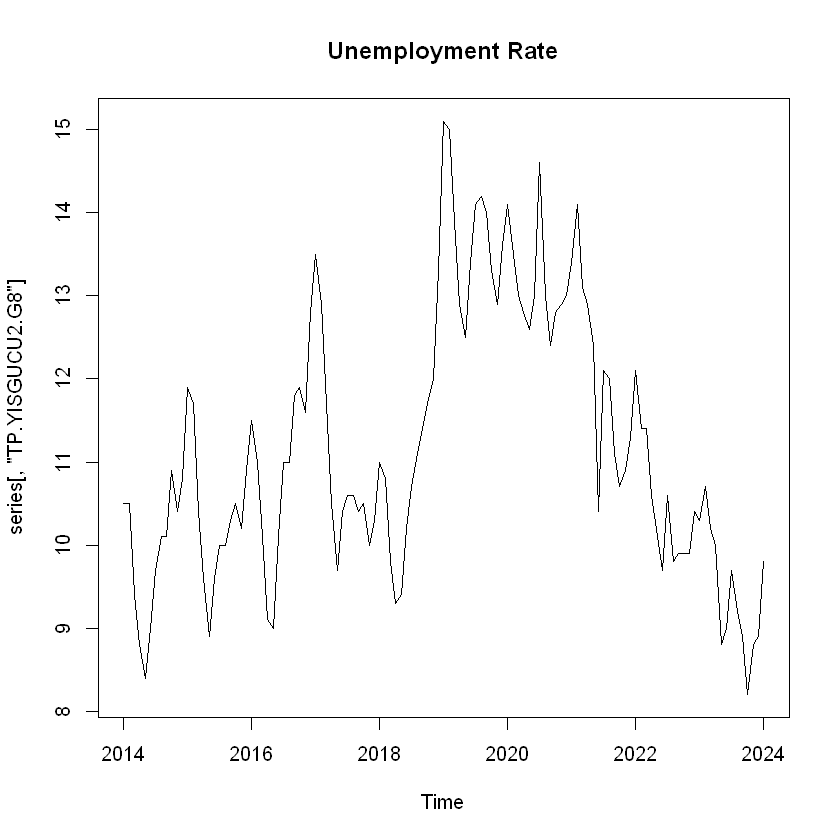

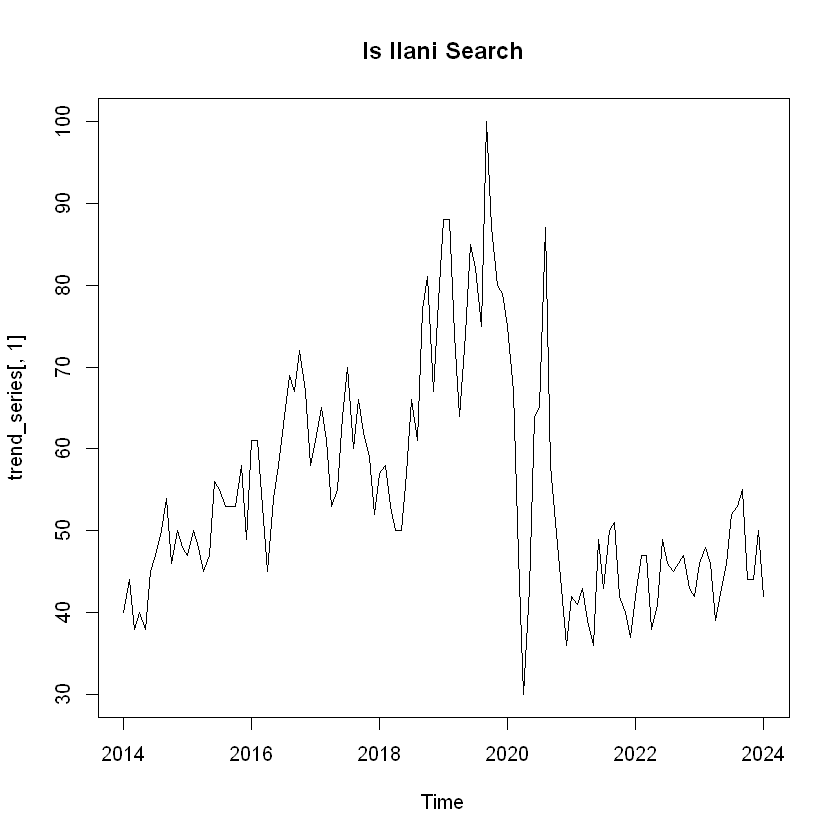

In [153]:
plot(series[,"TP.YISGUCU2.G8"],main = "Unemployment Rate")
plot(trend_series[,1],main = " 'Is Ilani' Search")

There is a strong correlation between graphs. It can be seen that both variables have an upward trend from 2014 to end of 2019 and 
they both exhibit a fall afterwards.

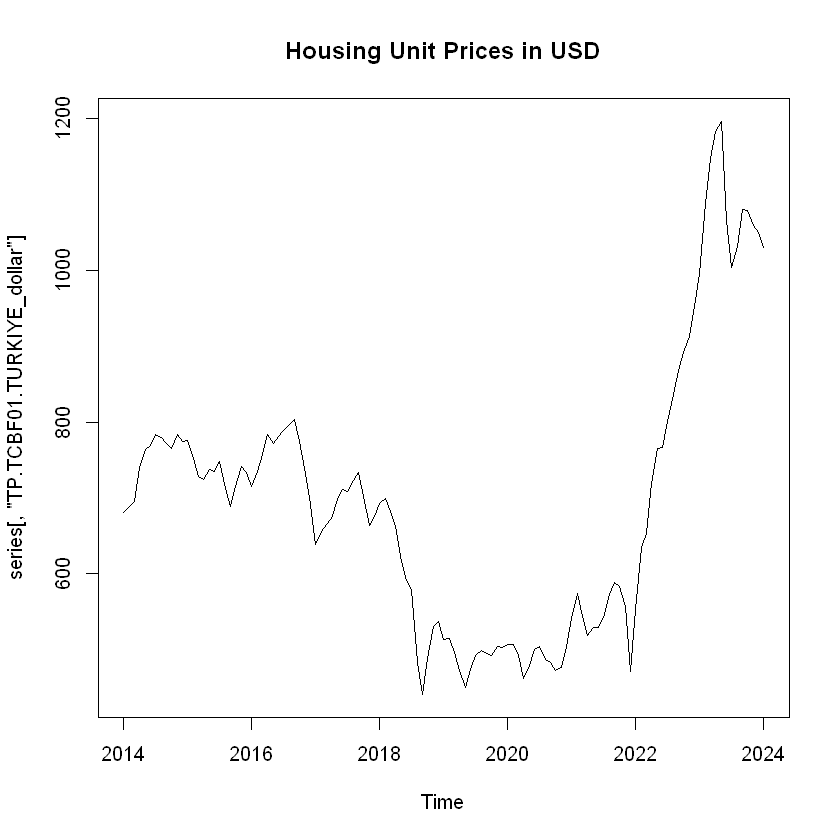

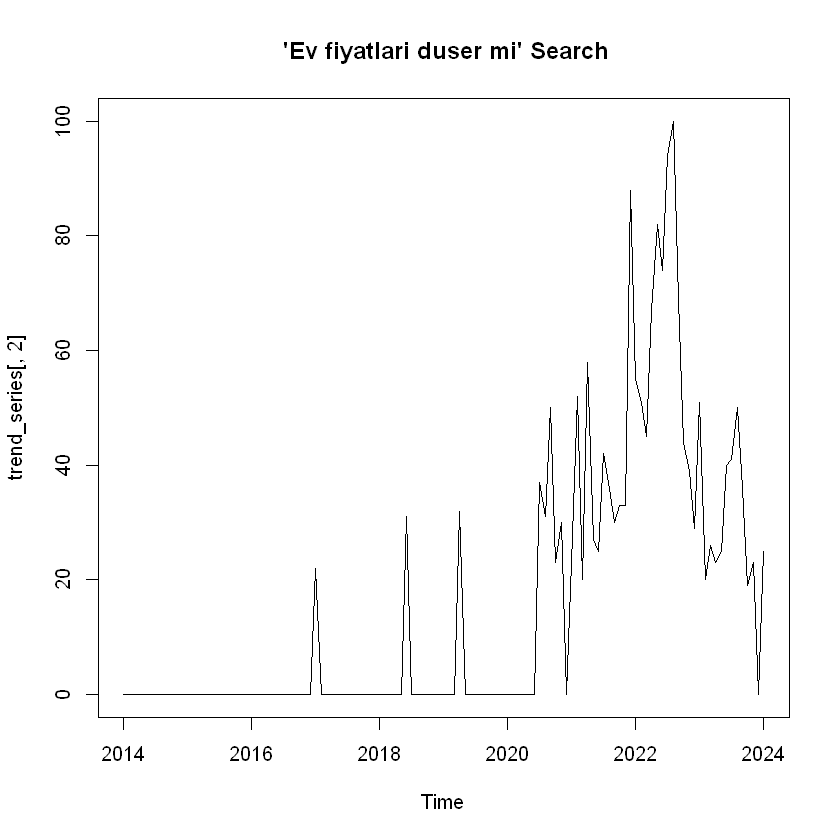

In [157]:
plot(series[,"TP.TCBF01.TURKIYE_dollar"],main = "Housing Unit Prices in USD")
plot(trend_series[,2],main = " 'Ev fiyatlari duser mi' Search")

They both have steep upward trend from 2020 to 2023 and have their peaks close to year 2023.

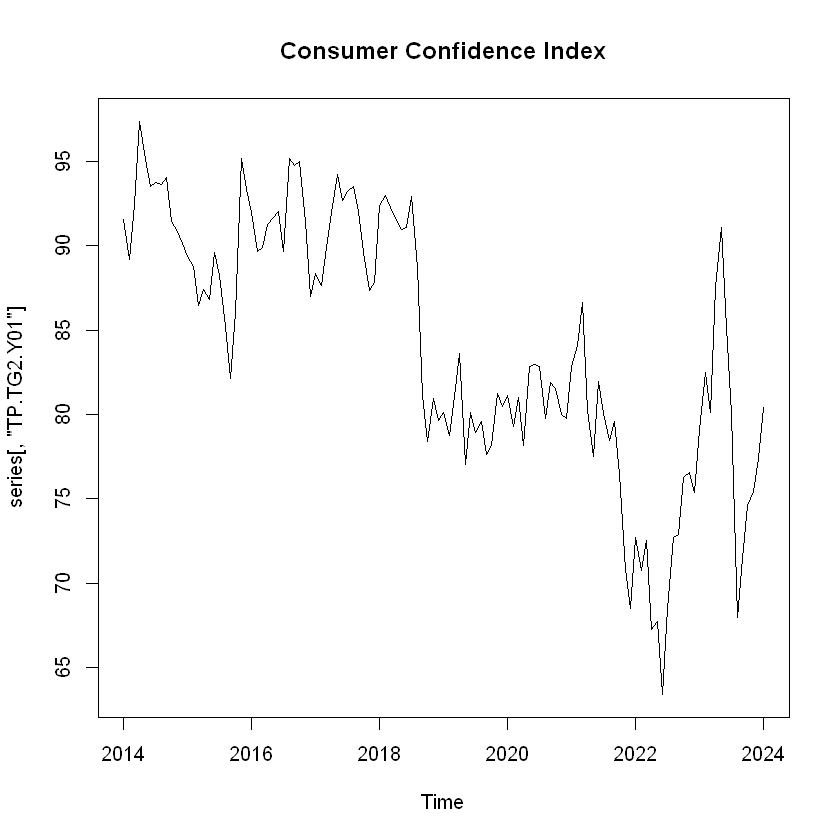

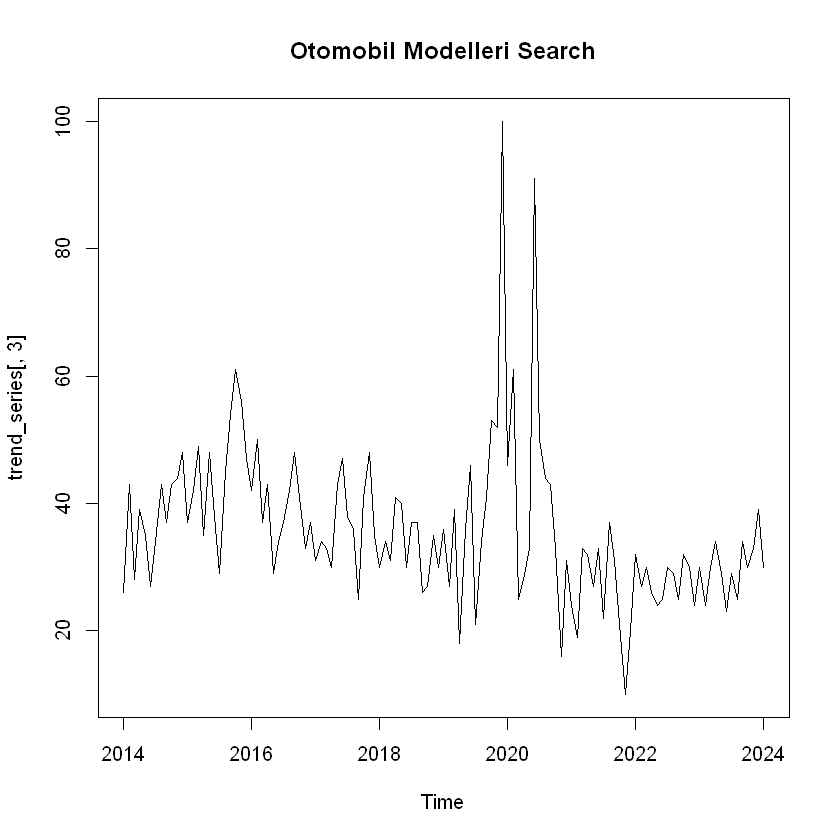

In [155]:
plot(series[,"TP.TG2.Y01"],main = "Consumer Confidence Index")
plot(trend_series[,3],main = " 'Otomobil Modelleri' Search")

In [ ]:
No clear relation can be found visually inspecting both graphs.

## Time Series Regression Target : Consumer Confidence Index

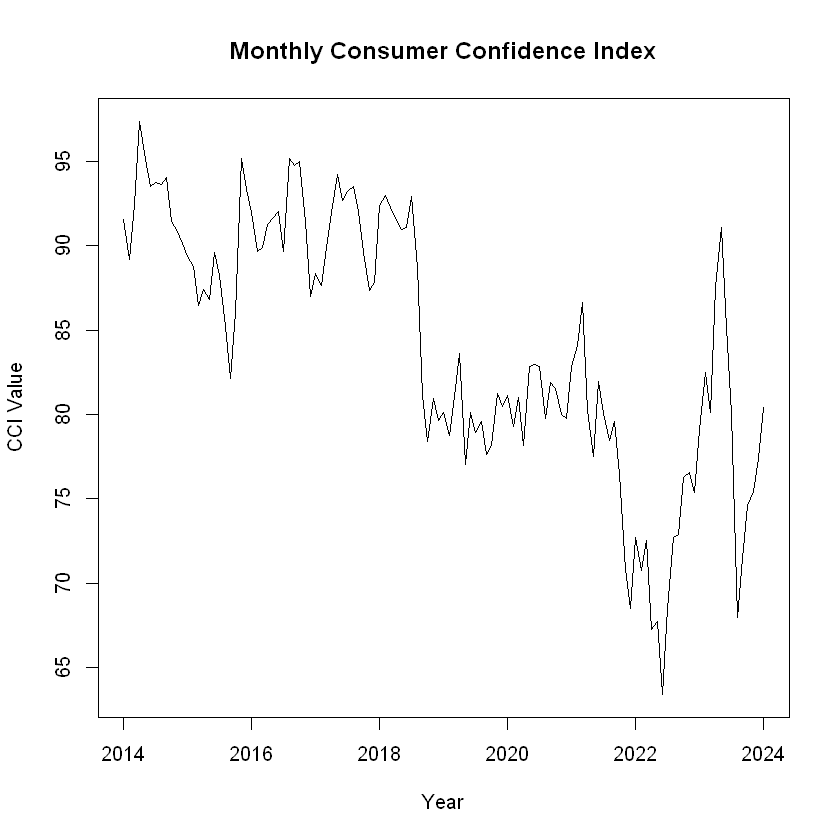

In [65]:
plot(series[,"TP.TG2.Y01"],ylab= "CCI Value", xlab="Year",main = "Monthly Consumer Confidence Index")

The CCI time series shows a downward trend, thus including a trend variable would contribute to our model. Also including google trends data on "otomobil fiyatlari" search and other variables might help our model.
Let's create a data table.

In [74]:
cci_table <- data.table(cci = series[,"TP.TG2.Y01"],
                       unemployment_rate = series[,"TP.YISGUCU2.G8"],
                       housing_unit_prices = series[,"TP.TCBF01.TURKIYE"],
                       otomobil_modelleri_search = trend_data[,"otomobil.modelleri"])

# Adding the trend column

cci_table$trend <- 1:dim(cci_table)[1]

tail(cci_table)

cci,unemployment_rate,housing_unit_prices,otomobil_modelleri_search,trend
68.01000,9.2,27815.5,25,116
71.47000,8.9,29107.7,34,117
74.62000,8.2,29995.0,30,118
75.47000,8.8,30290.2,33,119
77.42000,8.9,30480.0,39,120
80.42311,9.8,30900.3,30,121


Performing Regression

In [75]:
fit_cci <- lm(cci ~ unemployment_rate + housing_unit_prices + otomobil_modelleri_search + trend,data=cci_table)
summary(fit_cci)


Call:
lm(formula = cci ~ unemployment_rate + housing_unit_prices + 
    otomobil_modelleri_search + trend, data = cci_table)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3821  -2.7846   0.0897   2.7830  13.8605 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               98.8262269  4.1213414  23.979  < 2e-16 ***
unemployment_rate         -0.5001130  0.3947424  -1.267    0.208    
housing_unit_prices        0.0000723  0.0001192   0.606    0.545    
otomobil_modelleri_search  0.0313236  0.0388465   0.806    0.422    
trend                     -0.1755502  0.0249613  -7.033  1.5e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.799 on 116 degrees of freedom
Multiple R-squared:  0.6218,	Adjusted R-squared:  0.6088 
F-statistic: 47.68 on 4 and 116 DF,  p-value: < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 12

data:  Residuals
LM test = 77.228, df = 12, p-value = 1.391e-11



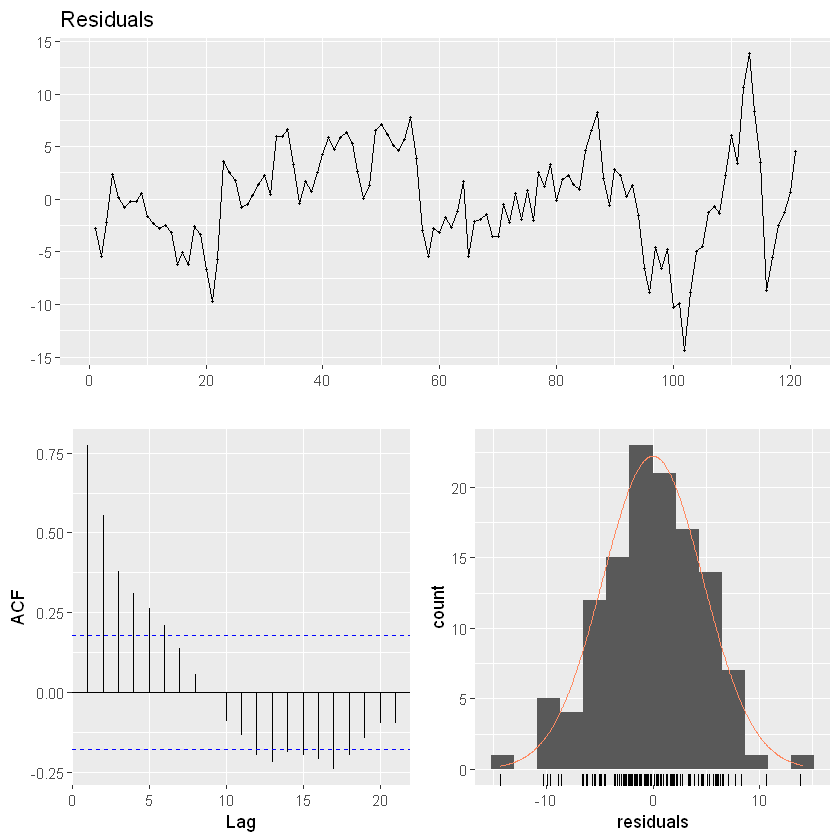

In [80]:
checkresiduals(fit_cci,12)

The residuals plot agrees with the assumption that residuals are normally distributed. Residuals plot shows no certain pattern which is good for our model. However, ACF plot shows a strong correlation between the residuals and its lag-1, lag-2, and lag-3 values, so including those lags in our model would be a great contribution.

In [101]:
cci_table$cci_lag1 = c(NA, head(cci_table$cci, -1))
cci_table$cci_lag2 = c(NA,NA, head(cci_table$cci, -2))
cci_table$cci_lag3 = c(NA,NA,NA, head(cci_table$cci, -3))

head(cci_table)

cci,unemployment_rate,housing_unit_prices,otomobil_modelleri_search,trend,cci_lag1,cci_lag2,cci_lag3
91.53853,10.5,1510.3,26,1,NA,NA,NA
89.21453,10.5,1524.5,43,2,91.53853,NA,NA
92.42525,9.4,1541.3,28,3,89.21453,91.53853,NA
97.36987,8.8,1575.2,39,4,92.42525,89.21453,91.53853
95.11075,8.4,1597.8,35,5,97.36987,92.42525,89.21453
93.49903,9.0,1628.4,27,6,95.11075,97.36987,92.42525


In [102]:
fit_cci_2 <- lm(cci ~ .,data=cci_table)

summary(fit_cci_2)


Call:
lm(formula = cci ~ ., data = cci_table)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8368  -1.7596   0.2127   1.8696   8.1782 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                2.315e+01  7.102e+00   3.259  0.00149 ** 
unemployment_rate         -1.461e-01  2.487e-01  -0.587  0.55812    
housing_unit_prices        4.434e-05  7.528e-05   0.589  0.55711    
otomobil_modelleri_search  3.200e-02  2.472e-02   1.294  0.19825    
trend                     -4.333e-02  2.029e-02  -2.136  0.03492 *  
cci_lag1                   8.951e-01  9.507e-02   9.415 8.58e-16 ***
cci_lag2                  -1.415e-01  1.265e-01  -1.118  0.26592    
cci_lag3                   4.532e-03  9.442e-02   0.048  0.96180    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.982 on 110 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.8584,	Adjusted R-sq


	Breusch-Godfrey test for serial correlation of order up to 11

data:  Residuals
LM test = 10.365, df = 11, p-value = 0.4979



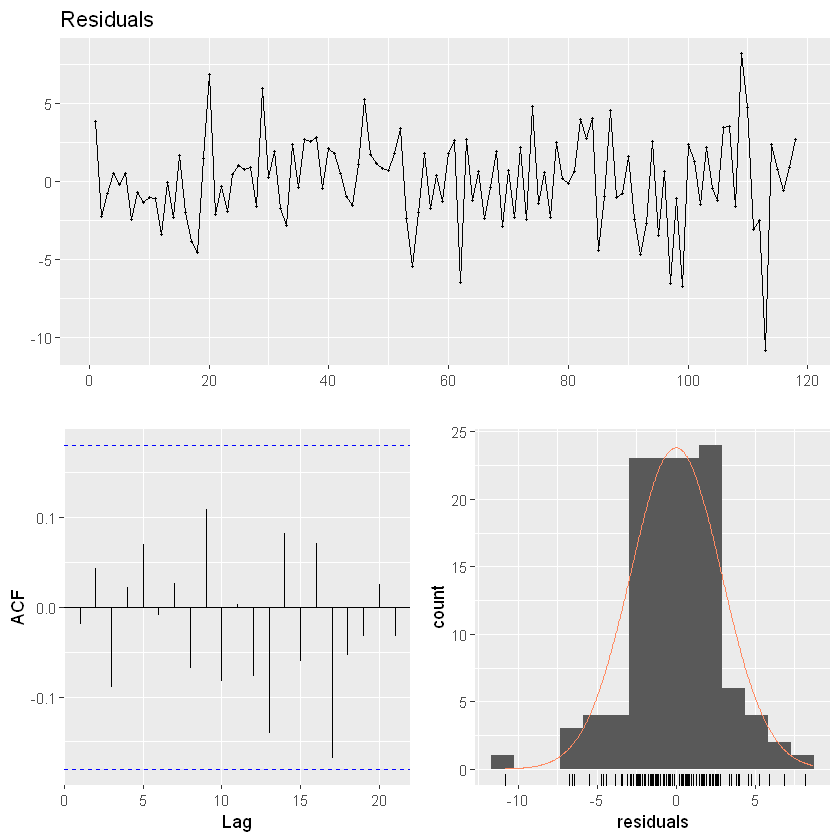

In [136]:
checkresiduals(fit_cci_2)

Adding the lagged variables resulted in much higher Adjusted R-Squared value and auto correlation between residuals are much less now.

## Time Series Regression Target : Consumer Confidence Index

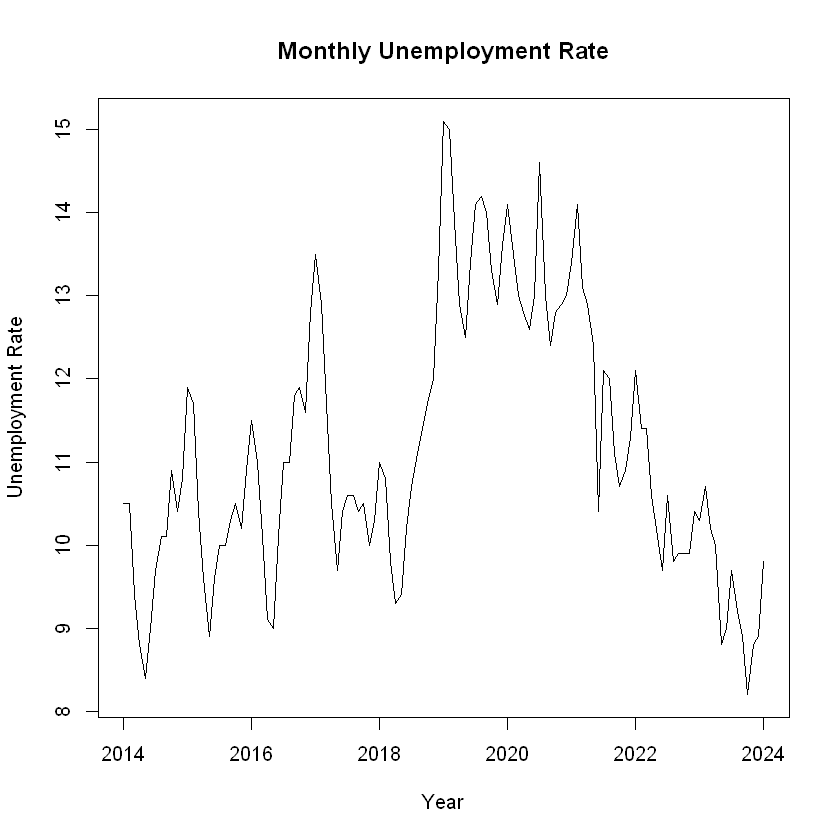

In [104]:
plot(series[,"TP.YISGUCU2.G8"],ylab="Unemployment Rate",xlab="Year",main = "Monthly Unemployment Rate")

There is no clear trend however seasonality seems present, using a season variable might contribute to our model. Let's add month info and the google trends data on "is ilani" search  to our previeous data table and go on with it.

In [124]:
month <- 1:12
cci_table <- cbind(cci_table,month)
cci_table$is_ilani_search = trend_data[,2]
head(cci_table)

Warning message in data.table::data.table(...):
"Item 2 is of size 12 but maximum size is 121 (recycled leaving remainder of 1 items)"

cci,unemployment_rate,housing_unit_prices,otomobil_modelleri_search,trend,cci_lag1,cci_lag2,cci_lag3,is_ilani_search,month
91.53853,10.5,1510.3,26,1,NA,NA,NA,40,1
89.21453,10.5,1524.5,43,2,91.53853,NA,NA,44,2
92.42525,9.4,1541.3,28,3,89.21453,91.53853,NA,38,3
97.36987,8.8,1575.2,39,4,92.42525,89.21453,91.53853,40,4
95.11075,8.4,1597.8,35,5,97.36987,92.42525,89.21453,38,5
93.49903,9.0,1628.4,27,6,95.11075,97.36987,92.42525,45,6


In [127]:
fit_unemployment <- lm(unemployment_rate ~ cci + housing_unit_prices + is_ilani_search + as.factor(month),data=cci_table)

summary(fit_unemployment)


Call:
lm(formula = unemployment_rate ~ cci + housing_unit_prices + 
    is_ilani_search + as.factor(month), data = cci_table)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8722 -0.7403 -0.1519  0.4308  2.6225 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.882e+01  1.400e+00  13.437  < 2e-16 ***
cci                 -1.033e-01  1.422e-02  -7.264  6.6e-11 ***
housing_unit_prices -1.053e-04  1.483e-05  -7.098  1.5e-10 ***
is_ilani_search      5.061e-02  7.854e-03   6.444  3.5e-09 ***
as.factor(month)2   -2.992e-01  4.505e-01  -0.664 0.508015    
as.factor(month)3   -7.465e-01  4.515e-01  -1.654 0.101184    
as.factor(month)4   -9.894e-01  4.584e-01  -2.159 0.033141 *  
as.factor(month)5   -1.639e+00  4.533e-01  -3.615 0.000461 ***
as.factor(month)6   -1.805e+00  4.499e-01  -4.013 0.000112 ***
as.factor(month)7   -1.067e+00  4.505e-01  -2.368 0.019706 *  
as.factor(month)8   -1.456e+00  4.517e-01  -3.224 0.001680 ** 
as.facto


	Breusch-Godfrey test for serial correlation of order up to 18

data:  Residuals
LM test = 78.641, df = 18, p-value = 1.48e-09



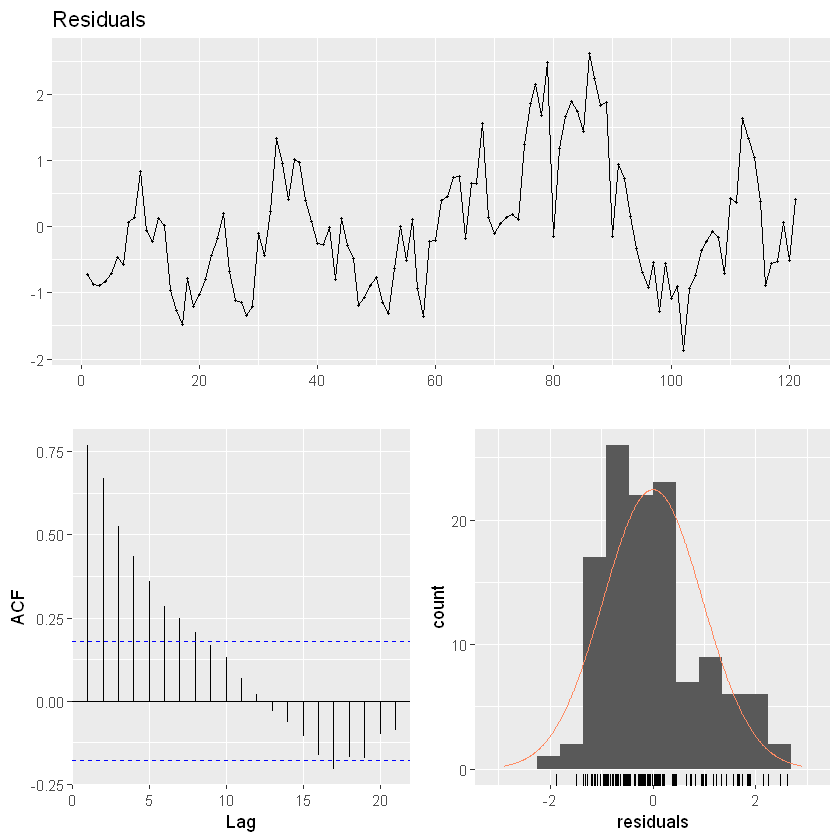

In [129]:
checkresiduals(fit_unemployment)

Residuals seem to be right skewed on the residuals histogram this violates the assumption that residuals are normally
distributed. Using a log transformation might help us on that.

In [130]:
log_unemployment_rate = log(cci_table[,"unemployment_rate"])
cci_table$log_unemployment_rate = log_unemployment_rate
head(cci_table)

cci,unemployment_rate,housing_unit_prices,otomobil_modelleri_search,trend,cci_lag1,cci_lag2,cci_lag3,is_ilani_search,month,log_unemployment_rate
91.53853,10.5,1510.3,26,1,NA,NA,NA,40,1,2.351375
89.21453,10.5,1524.5,43,2,91.53853,NA,NA,44,2,2.351375
92.42525,9.4,1541.3,28,3,89.21453,91.53853,NA,38,3,2.240710
97.36987,8.8,1575.2,39,4,92.42525,89.21453,91.53853,40,4,2.174752
95.11075,8.4,1597.8,35,5,97.36987,92.42525,89.21453,38,5,2.128232
93.49903,9.0,1628.4,27,6,95.11075,97.36987,92.42525,45,6,2.197225


In [131]:
fit_unemployment_2 <- lm(log_unemployment_rate ~ cci + housing_unit_prices + is_ilani_search + as.factor(month),data=cci_table)

summary(fit_unemployment_2)


Call:
lm(formula = log_unemployment_rate ~ cci + housing_unit_prices + 
    is_ilani_search + as.factor(month), data = cci_table)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.164518 -0.067026 -0.007424  0.045883  0.210684 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.100e+00  1.225e-01  25.318  < 2e-16 ***
cci                 -9.163e-03  1.243e-03  -7.369 3.94e-11 ***
housing_unit_prices -9.837e-06  1.297e-06  -7.584 1.35e-11 ***
is_ilani_search      4.179e-03  6.868e-04   6.085 1.89e-08 ***
as.factor(month)2   -2.572e-02  3.939e-02  -0.653 0.515231    
as.factor(month)3   -6.522e-02  3.948e-02  -1.652 0.101507    
as.factor(month)4   -9.197e-02  4.009e-02  -2.294 0.023745 *  
as.factor(month)5   -1.530e-01  3.964e-02  -3.861 0.000195 ***
as.factor(month)6   -1.596e-01  3.934e-02  -4.057 9.52e-05 ***
as.factor(month)7   -9.206e-02  3.939e-02  -2.337 0.021332 *  
as.factor(month)8   -1.246e-01  3.950e-02  -3.1


	Breusch-Godfrey test for serial correlation of order up to 18

data:  Residuals
LM test = 79.201, df = 18, p-value = 1.182e-09



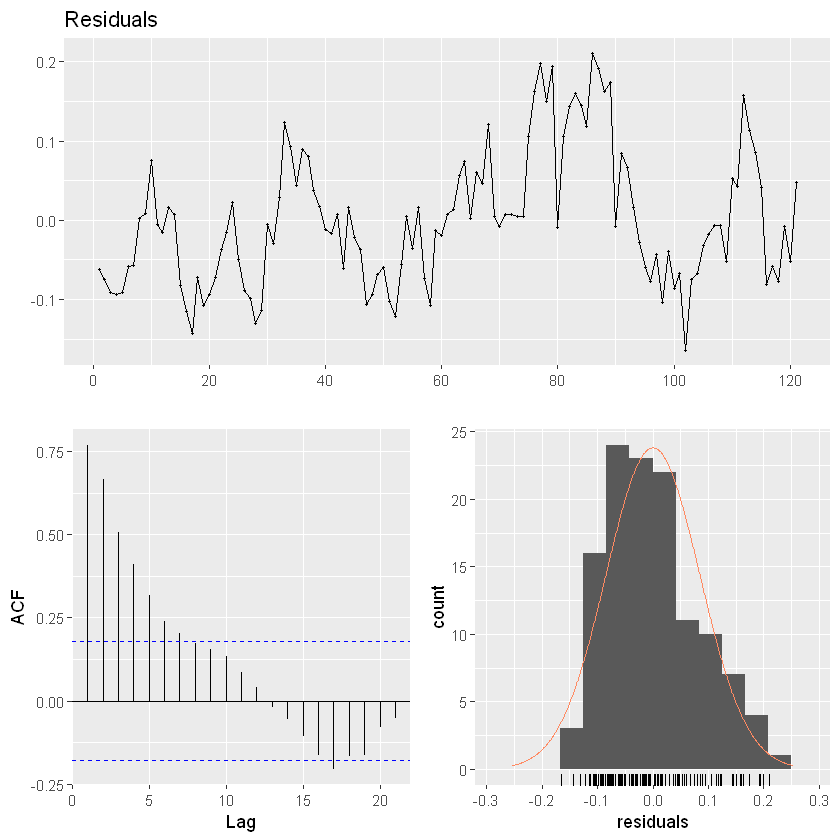

In [133]:
checkresiduals(fit_unemployment_2)

Residual seem more normal this time. 
Like the previous series on CCI unemployment rate residuals have strong correlation for lower lags, we should include it
in our model to get a better fit.

In [134]:
cci_table$unemployment_rate_1 = c(NA, head(cci_table$unemployment_rate, -1))
cci_table$unemployment_rate_2 = c(NA,NA, head(cci_table$unemployment_rate, -2))
cci_table$unemployment_rate_3 = c(NA,NA,NA, head(cci_table$unemployment_rate, -3))

head(cci_table)

cci,unemployment_rate,housing_unit_prices,otomobil_modelleri_search,trend,cci_lag1,cci_lag2,cci_lag3,is_ilani_search,month,log_unemployment_rate,unemployment_rate_1,unemployment_rate_2,unemployment_rate_3
91.53853,10.5,1510.3,26,1,NA,NA,NA,40,1,2.351375,NA,NA,NA
89.21453,10.5,1524.5,43,2,91.53853,NA,NA,44,2,2.351375,10.5,NA,NA
92.42525,9.4,1541.3,28,3,89.21453,91.53853,NA,38,3,2.240710,10.5,10.5,NA
97.36987,8.8,1575.2,39,4,92.42525,89.21453,91.53853,40,4,2.174752,9.4,10.5,10.5
95.11075,8.4,1597.8,35,5,97.36987,92.42525,89.21453,38,5,2.128232,8.8,9.4,10.5
93.49903,9.0,1628.4,27,6,95.11075,97.36987,92.42525,45,6,2.197225,8.4,8.8,9.4


In [135]:
fit_unemployment_3 <- lm(log_unemployment_rate ~ unemployment_rate_1 + unemployment_rate_2 + unemployment_rate_3 + 
                         cci + housing_unit_prices + is_ilani_search + as.factor(month),data=cci_table)

summary(fit_unemployment_3)


Call:
lm(formula = log_unemployment_rate ~ unemployment_rate_1 + unemployment_rate_2 + 
    unemployment_rate_3 + cci + housing_unit_prices + is_ilani_search + 
    as.factor(month), data = cci_table)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.173731 -0.027968  0.001281  0.028496  0.082746 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.667e+00  1.036e-01  16.090  < 2e-16 ***
unemployment_rate_1  7.031e-02  9.396e-03   7.483 2.89e-11 ***
unemployment_rate_2  3.468e-03  1.157e-02   0.300 0.765013    
unemployment_rate_3  4.040e-03  8.887e-03   0.455 0.650421    
cci                 -6.638e-04  7.908e-04  -0.839 0.403261    
housing_unit_prices -2.082e-06  7.909e-07  -2.633 0.009820 ** 
is_ilani_search      1.704e-04  4.150e-04   0.411 0.682190    
as.factor(month)2   -7.224e-02  2.163e-02  -3.340 0.001177 ** 
as.factor(month)3   -1.316e-01  2.281e-02  -5.769 8.94e-08 ***
as.factor(month)4   -1.375e-01  2.391e-


	Breusch-Godfrey test for serial correlation of order up to 21

data:  Residuals
LM test = 26.682, df = 21, p-value = 0.1816



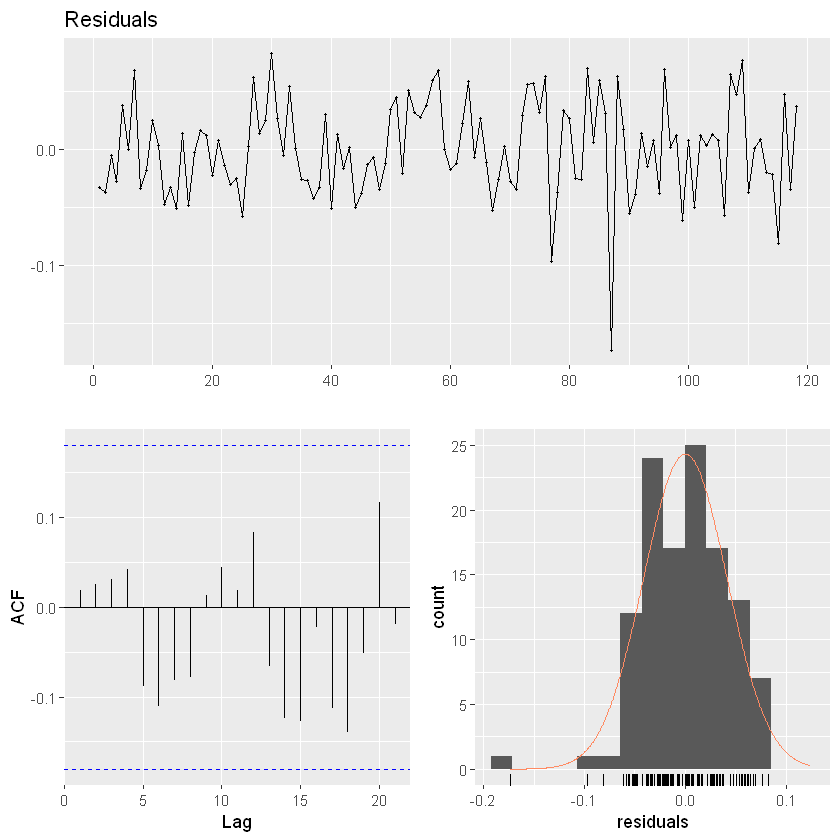

In [137]:
checkresiduals(fit_unemployment_3)

Now we have a much better model with Adjusted R-squared value equal to 0.9017.

## Time Series Regression Target : Housing Unit Prices

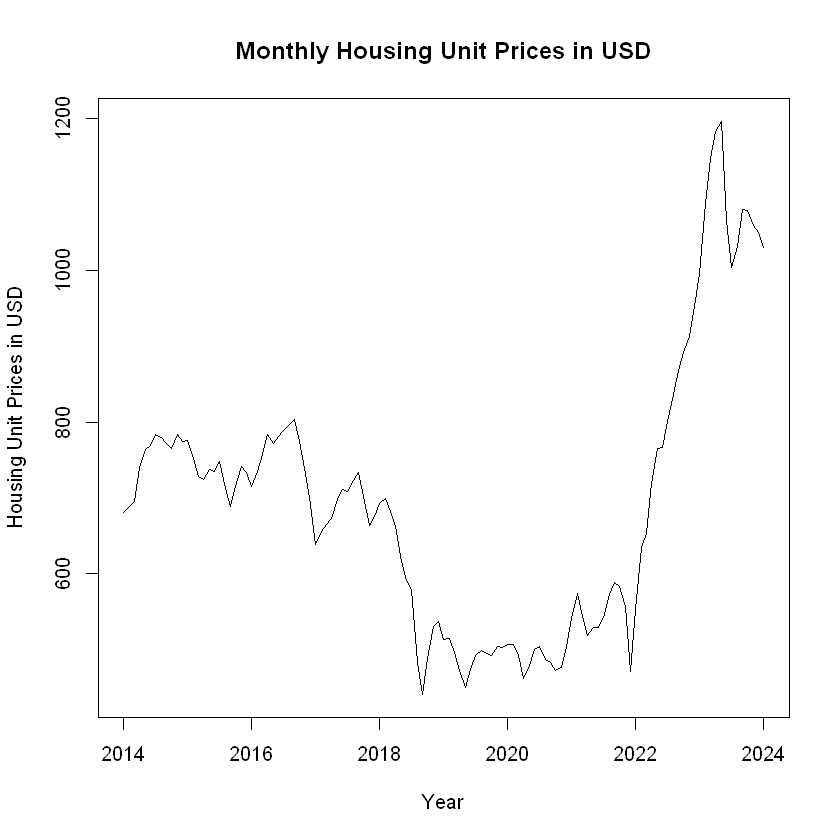

In [138]:

plot(series[,"TP.TCBF01.TURKIYE_dollar"],ylab ="Housing Unit Prices in USD",xlab="Year" ,main = "Monthly Housing Unit Prices in USD")

We can see that the variance increases over time. Logarithmic transformation can be useful to obtain constant variance. And adding the 
google search data for "ev fiyatlari duser mi" search.

In [140]:
cci_table$log_housing = log(cci_table$housing_unit_prices)
cci_table$ev_fiyatlari_search = trend_data[,3]

head(cci_table)

cci,unemployment_rate,housing_unit_prices,otomobil_modelleri_search,trend,cci_lag1,cci_lag2,cci_lag3,is_ilani_search,month,log_unemployment_rate,unemployment_rate_1,unemployment_rate_2,unemployment_rate_3,log_housing,ev_fiyatlari_search
91.53853,10.5,1510.3,26,1,NA,NA,NA,40,1,2.351375,NA,NA,NA,7.320064,0
89.21453,10.5,1524.5,43,2,91.53853,NA,NA,44,2,2.351375,10.5,NA,NA,7.329422,0
92.42525,9.4,1541.3,28,3,89.21453,91.53853,NA,38,3,2.240710,10.5,10.5,NA,7.340381,0
97.36987,8.8,1575.2,39,4,92.42525,89.21453,91.53853,40,4,2.174752,9.4,10.5,10.5,7.362138,0
95.11075,8.4,1597.8,35,5,97.36987,92.42525,89.21453,38,5,2.128232,8.8,9.4,10.5,7.376383,0
93.49903,9.0,1628.4,27,6,95.11075,97.36987,92.42525,45,6,2.197225,8.4,8.8,9.4,7.395353,0


Let's fit our model.

fit_unemployment <- lm(unemployment_rate ~ cci + housing_unit_prices + is_ilani_search + as.factor(month),data=cci_table)

summary(fit_unemployment)

In [142]:
fit_housing <- lm(log_housing ~ cci + unemployment_rate,data=cci_table)

summary(fit_housing)


Call:
lm(formula = log_housing ~ cci + unemployment_rate, data = cci_table)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99779 -0.34627 -0.04411  0.18407  1.83580 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       17.747323   0.726466   24.43  < 2e-16 ***
cci               -0.082773   0.006677  -12.40  < 2e-16 ***
unemployment_rate -0.224851   0.031851   -7.06 1.24e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5488 on 118 degrees of freedom
Multiple R-squared:  0.5967,	Adjusted R-squared:  0.5898 
F-statistic: 87.28 on 2 and 118 DF,  p-value: < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 91.859, df = 10, p-value = 2.29e-15



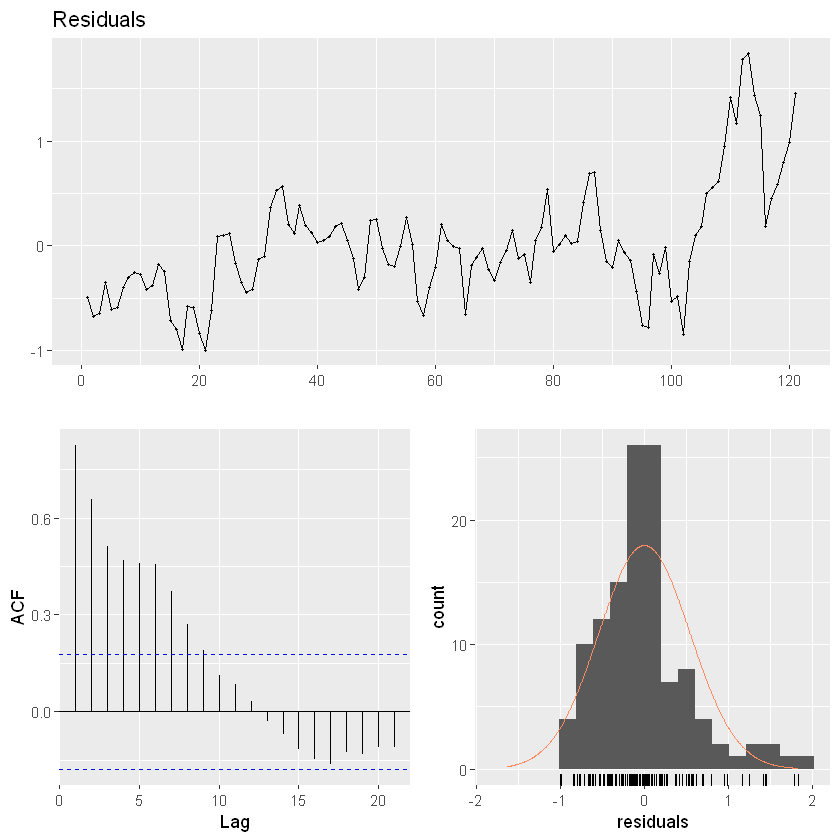

In [143]:
checkresiduals(fit_housing)

Again there is an autocorrelatin in residuals adding the first few lags will be helpful.

In [144]:
cci_table$housing_unit_prices_1 = c(NA, head(cci_table$housing_unit_prices, -1))
cci_table$housing_unit_prices_2 = c(NA,NA, head(cci_table$housing_unit_prices, -2))


head(cci_table)

cci,unemployment_rate,housing_unit_prices,otomobil_modelleri_search,trend,cci_lag1,cci_lag2,cci_lag3,is_ilani_search,month,log_unemployment_rate,unemployment_rate_1,unemployment_rate_2,unemployment_rate_3,log_housing,ev_fiyatlari_search,housing_unit_prices_1,housing_unit_prices_2
91.53853,10.5,1510.3,26,1,NA,NA,NA,40,1,2.351375,NA,NA,NA,7.320064,0,NA,NA
89.21453,10.5,1524.5,43,2,91.53853,NA,NA,44,2,2.351375,10.5,NA,NA,7.329422,0,1510.3,NA
92.42525,9.4,1541.3,28,3,89.21453,91.53853,NA,38,3,2.240710,10.5,10.5,NA,7.340381,0,1524.5,1510.3
97.36987,8.8,1575.2,39,4,92.42525,89.21453,91.53853,40,4,2.174752,9.4,10.5,10.5,7.362138,0,1541.3,1524.5
95.11075,8.4,1597.8,35,5,97.36987,92.42525,89.21453,38,5,2.128232,8.8,9.4,10.5,7.376383,0,1575.2,1541.3
93.49903,9.0,1628.4,27,6,95.11075,97.36987,92.42525,45,6,2.197225,8.4,8.8,9.4,7.395353,0,1597.8,1575.2


In [146]:
fit_housing_2 <- lm(log_housing ~ cci + unemployment_rate + housing_unit_prices_1 + housing_unit_prices_2 ,data=cci_table)

summary(fit_housing_2)


Call:
lm(formula = log_housing ~ cci + unemployment_rate + housing_unit_prices_1 + 
    housing_unit_prices_2, data = cci_table)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66157 -0.13931  0.02694  0.13358  0.36710 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            9.030e+00  4.083e-01  22.113  < 2e-16 ***
cci                   -1.976e-02  3.347e-03  -5.905 3.72e-08 ***
unemployment_rate      2.830e-02  1.405e-02   2.015   0.0463 *  
housing_unit_prices_1  4.594e-04  7.354e-05   6.246 7.47e-09 ***
housing_unit_prices_2 -3.752e-04  7.565e-05  -4.960 2.48e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1833 on 114 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.9556,	Adjusted R-squared:  0.9541 
F-statistic: 613.7 on 4 and 114 DF,  p-value: < 2.2e-16



	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 84.993, df = 10, p-value = 5.237e-14



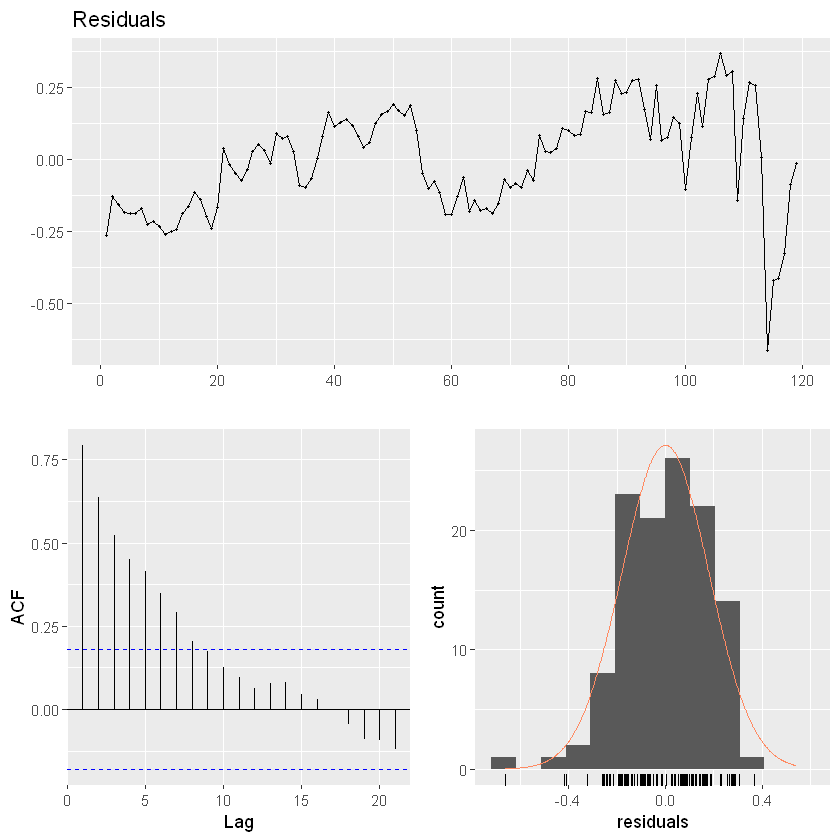

In [147]:
checkresiduals(fit_housing_2)

### Conclusion
As a result of the last model's summary, we could not see the relation between CCI and housing unit prices as expected.
I started the research with the hypothesis that if cci increases housing prices should increase whereas in the model cci has negative and 
relatively small coefficent. This applies for the relation between unemployment rate variable as well. 

When I export the file as HTML, some parts of the markdown blocks gets corrupted, I tried several ways but could not fix it.
Sorry for the inconvenience.